In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/ML+01+Ridge+Regession+Dataset+1.csv')

In [ ]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [ ]:
# Checking the shape of our data
df.shape

(4000, 19)

In [ ]:
# Checking the size of the dataset.
df.size

76000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [ ]:
# Using describe function we will check how our data looks
df.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
df.dtypes
# Car Insurance is our target variable

Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [ ]:
# These columns have high correlation with Target
# HHInsurance,CarLoan,NoofContacts,Dayspassed,Prevattempts
(df.corr()['CarInsurance'])*100

<ipython-input-329-b09b893901bf>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Age                 3.915780
Default            -3.950566
Balance             4.156101
HHInsurance       -20.341925
CarLoan            -9.213108
LastContactDay     -6.127088
NoOfContacts      -11.488370
DaysPassed         13.894286
PrevAttempts       14.876258
CarInsurance      100.000000
Name: CarInsurance, dtype: float64

# Data Cleaning
### now we will be start missing value treatment in our dataset.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [ ]:
df.drop(['Outcome','CallStart','CallEnd','Marital','Education','Balance'],axis=1,inplace=True)

In [ ]:
df['Job'].unique()

array(['management', 'blue-collar', 'student', 'technician', 'admin.',
       'services', 'self-employed', 'retired', nan, 'housemaid',
       'entrepreneur', 'unemployed'], dtype=object)

In [ ]:
df['Job'].value_counts()

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64

In [ ]:
df['Job'].mode()[0]

'management'

In [ ]:
df['Job']=df['Job'].fillna(df['Job'].mode()[0])

In [ ]:
df['Job'].replace(to_replace=['student','retired'],value='unemployed',inplace=True)
df['Job'].replace(to_replace=['self-employed'],value='entrepreneur',inplace=True)
df['Job'].replace(to_replace=['housemaid','technician'],value='services',inplace=True)

In [ ]:
df['Job'].value_counts()

services        1099
management       912
blue-collar      759
unemployed       510
admin.           459
entrepreneur     261
Name: Job, dtype: int64

In [ ]:
df['Communication'].value_counts()

cellular     2831
telephone     267
Name: Communication, dtype: int64

In [ ]:
df['Communication']=df['Communication'].fillna('telephone')

In [ ]:
s=df.select_dtypes(include=['int64', 'float64'])
s.columns

Index(['Age', 'Default', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance'],
      dtype='object')

In [ ]:
df['Age'].value_counts()

31    182
32    177
33    164
34    163
35    157
     ... 
86      2
87      1
84      1
92      1
95      1
Name: Age, Length: 70, dtype: int64

In [ ]:
df['Default'].value_counts()
# We will drop this column as this column has more 50% values which are equal to 0 after checking the others

0    3942
1      58
Name: Default, dtype: int64

In [ ]:
df.corr()['Default']['CarInsurance']

<ipython-input-344-1df9d30ea9cc>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



-0.03950565549444613

In [ ]:
df['HHInsurance'].value_counts()

0    2029
1    1971
Name: HHInsurance, dtype: int64

In [ ]:
df['CarLoan'].value_counts()
# We will drop this column as this column has more 50% values which are equal to 0 after checking the others

0    3468
1     532
Name: CarLoan, dtype: int64

In [ ]:
df['LastContactDay'].value_counts()

18    203
20    196
13    171
30    167
15    165
17    163
19    158
8     158
7     157
21    156
5     152
12    150
6     145
29    142
2     138
4     136
28    136
11    135
9     129
14    127
16    125
27    102
26     98
25     94
3      93
23     89
22     88
10     72
24     54
31     52
1      49
Name: LastContactDay, dtype: int64

In [ ]:
df['NoOfContacts'].value_counts()

1     1685
2     1085
3      516
4      237
5      166
6       88
7       49
8       41
9       20
10      18
11      15
17      11
12      11
13       8
14       7
25       4
20       4
21       4
22       3
23       3
15       3
19       3
16       3
24       3
18       3
43       1
41       1
30       1
38       1
28       1
29       1
32       1
26       1
34       1
27       1
Name: NoOfContacts, dtype: int64

In [ ]:
df['DaysPassed'].value_counts()

-1      3042
 92       38
 182      33
 183      24
 91       24
        ... 
 212       1
 226       1
 76        1
 388       1
 40        1
Name: DaysPassed, Length: 330, dtype: int64

In [ ]:
df['PrevAttempts'].value_counts()

0     3042
1      335
2      251
3      125
4       79
5       60
6       25
7       21
8       18
10      10
9        9
12       5
14       5
13       4
19       4
11       3
30       1
23       1
18       1
58       1
Name: PrevAttempts, dtype: int64

In [ ]:
df.drop('Default',axis=1,inplace=True)
# df.drop('CarLoan',axis=1,inplace=True)
df.drop('DaysPassed',axis=1,inplace=True)

In [ ]:
s=df.select_dtypes(include=['int64', 'float64'])
s.columns

Index(['Age', 'HHInsurance', 'CarLoan', 'LastContactDay', 'NoOfContacts',
       'PrevAttempts', 'CarInsurance'],
      dtype='object')

In [ ]:
o=df.select_dtypes(include=['object'])
o.columns

Index(['Job', 'Communication', 'LastContactMonth'], dtype='object')

# Univariate Analysis


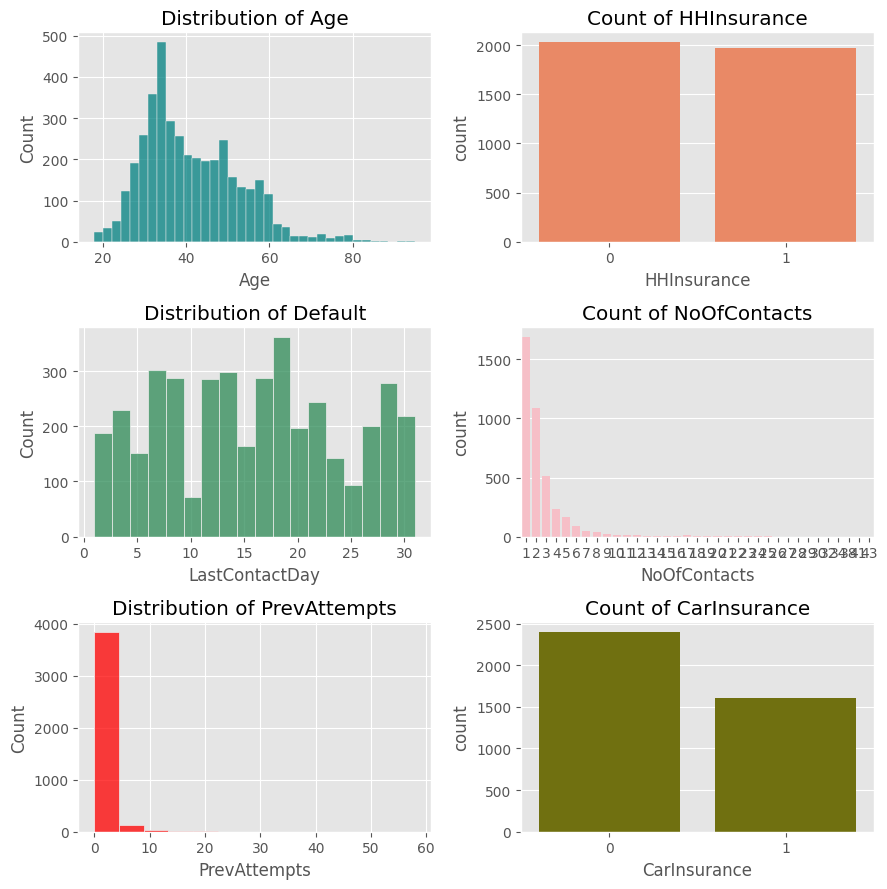

In [ ]:
# Univariate analysis of numerical columns

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (9,9))
plt.subplots_adjust(wspace=2)

#  Age
sns.histplot(data = df, x = 'Age', color = 'teal', ax=axes[0,0])
axes[0,0].set_title('Distribution of Age');

#  HHInsurance
sns.countplot(data = df, x = 'HHInsurance', color = 'coral', ax=axes[0,1])
axes[0,1].set_title('Count of HHInsurance');

# LastContactDay
sns.histplot(data = df, x = 'LastContactDay', color = 'seagreen', ax=axes[1,0])
axes[1,0].set_title('Distribution of Default');

#  NoOfContacts
sns.countplot(data = df, x = 'NoOfContacts', color  = 'lightpink', ax=axes[1,1])
axes[1,1].set_title('Count of NoOfContacts');


sns.histplot(data = df, x = 'PrevAttempts', color = 'red', ax=axes[2,0])
axes[2,0].set_title('Distribution of PrevAttempts');


sns.countplot(data = df, x = 'CarInsurance', color = 'olive', ax=axes[2,1])
axes[2,1].set_title('Count of CarInsurance');

plt.tight_layout()
plt.show()

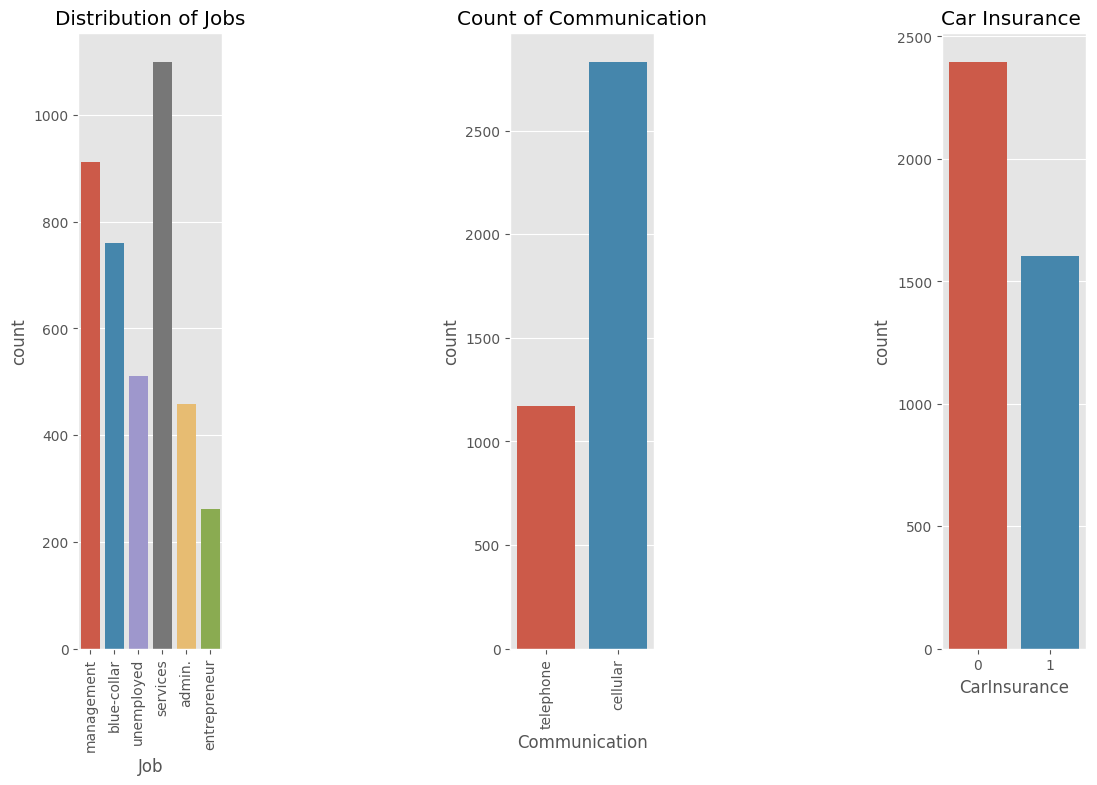

In [ ]:
# Univariate Analysis of Categorical variables

plt.style.use('ggplot')
fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(13, 8))
plt.subplots_adjust(wspace=2)

sns.countplot(data=df, x='Job', ax=ax1)
ax1.set_title('Distribution of Jobs');
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);


sns.countplot(data=df, x='Communication', ax=ax2)
ax2.set_title('Count of Communication')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90);

ax3=sns.countplot(data=df,x='CarInsurance')
ax3.set_title('Car Insurance ');
plt.show()

# Bivariate Analysis
### Here we will be checking relationship between dependent variables and independent variables

In [ ]:
from matplotlib import style

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
df.columns

Index(['Age', 'Job', 'HHInsurance', 'CarLoan', 'Communication',
       'LastContactDay', 'LastContactMonth', 'NoOfContacts', 'PrevAttempts',
       'CarInsurance'],
      dtype='object')

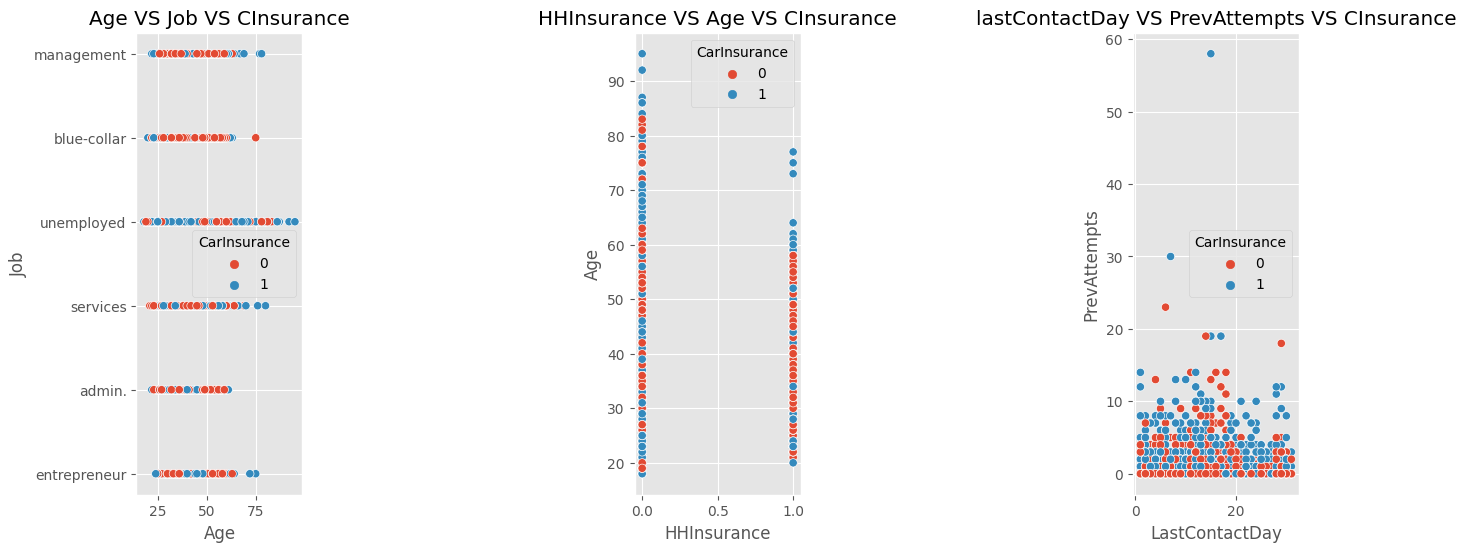

In [ ]:
# 'Age', 'Job', 'HHInsurance', 'Communication', 'LastContactDay','LastContactMonth', 'NoOfContacts', 'PrevAttempts', 'CarInsurance'],
plt.style.use('ggplot')
fig, (ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
plt.subplots_adjust(wspace=2)

sns.scatterplot(data=df, x='Age', y='Job', hue='CarInsurance', ax=ax4)
ax4.set_title('Age VS Job VS CInsurance');

sns.scatterplot(data=df, x='HHInsurance', y='Age', hue='CarInsurance', ax=ax5)
ax5.set_title('HHInsurance VS Age VS CInsurance');

sns.scatterplot(data=df, x='LastContactDay', y='PrevAttempts', hue='CarInsurance', ax=ax6)
ax6.set_title('lastContactDay VS PrevAttempts VS CInsurance');

plt.show()

<ipython-input-359-5d6f64aeaffc>:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



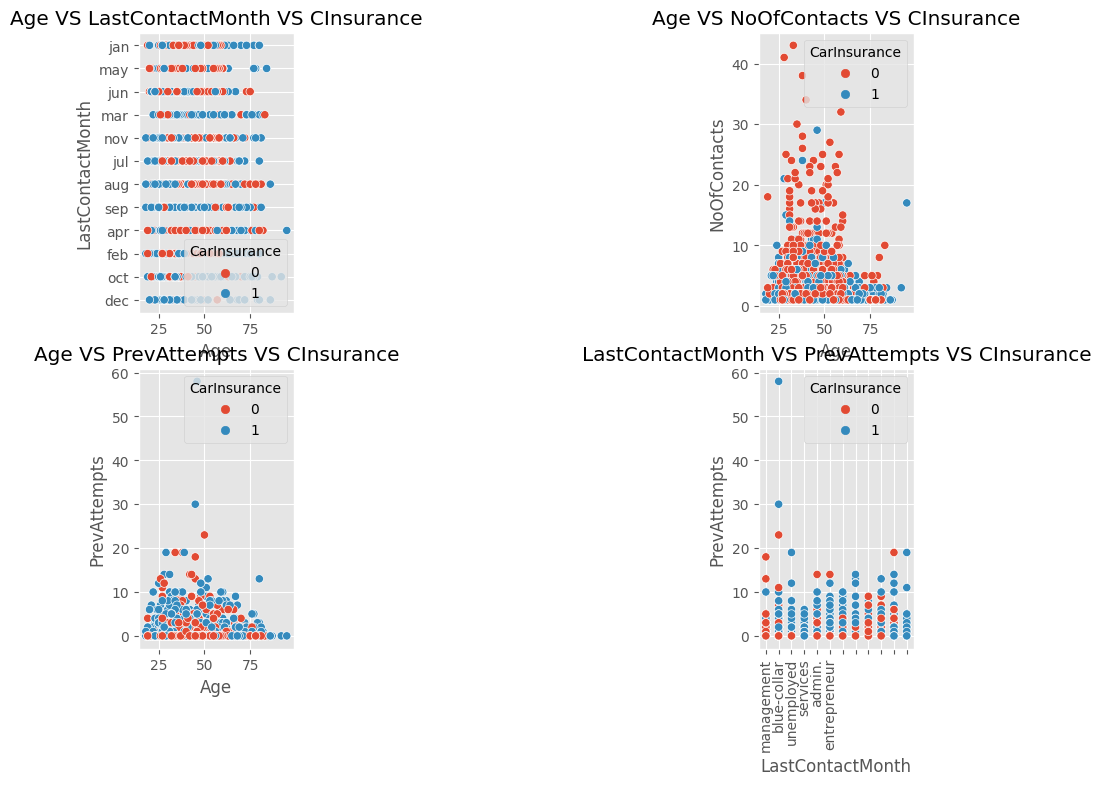

In [ ]:
# 'Age', 'Job', 'HHInsurance', 'Communication', 'LastContactDay','LastContactMonth', 'NoOfContacts', 'PrevAttempts', 'CarInsurance'],
plt.style.use('ggplot')

fig, ((ax4, ax5), (ax6,ax8)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=3)

sns.scatterplot(data=df, x='Age', y='LastContactMonth', hue='CarInsurance', ax=ax4)
ax4.set_title('Age VS LastContactMonth VS CInsurance');

sns.scatterplot(data=df, x='Age', y='NoOfContacts', hue='CarInsurance', ax=ax5)
ax5.set_title('Age VS NoOfContacts VS CInsurance');

sns.scatterplot(data=df, x='Age', y='PrevAttempts', hue='CarInsurance', ax=ax6)
ax6.set_title('Age VS PrevAttempts VS CInsurance');

sns.scatterplot(data=df,x='LastContactMonth',y='PrevAttempts',hue='CarInsurance',ax=ax8)
ax8.set_title('LastContactMonth VS PrevAttempts VS CInsurance')
ax8.set_xticklabels(ax1.get_xticklabels(), rotation=90);

plt.show()


In [ ]:
# Outliers in columns NoofContacts,Prevattempts
df.describe()

,Age,HHInsurance,CarLoan,LastContactDay,NoOfContacts,PrevAttempts,CarInsurance
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.214750,0.49275,0.133000,15.721250,2.607250,0.717500,0.401000
std,11.550194,0.50001,0.339617,8.425307,3.064204,2.078647,0.490162
min,18.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,0.00000,0.000000,8.000000,1.000000,0.000000,0.000000
50%,39.000000,0.00000,0.000000,16.000000,2.000000,0.000000,0.000000
75%,49.000000,1.00000,0.000000,22.000000,3.000000,0.000000,1.000000
max,95.000000,1.00000,1.000000,31.000000,43.000000,58.000000,1.000000


In [ ]:
px.box(data_frame=df,x='NoOfContacts',color_discrete_sequence=['limegreen'])

In [ ]:
Q3 = df['NoOfContacts'].quantile(.75)
Q1 = df['NoOfContacts'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q1 - 1.5*(IQR)
print(UL)
print(LL)

6.0
-2.0


In [ ]:
df['NoOfContacts']=np.where(df['NoOfContacts']>6,6,df['NoOfContacts'])

In [ ]:
px.box(data_frame=df,x='NoOfContacts',color_discrete_sequence=['pink'])

In [ ]:
px.box(data_frame=df,x='PrevAttempts',color_discrete_sequence=['brown'])

In [ ]:
df['NoOfContacts'].value_counts()

1    1685
2    1085
3     516
6     311
4     237
5     166
Name: NoOfContacts, dtype: int64

In [ ]:
# df['NoOfContacts']=pd.cut(df['NoOfContacts'],bins=[-1,1,3,44],labels=['Normal','mid','high'])

In [ ]:
df['PrevAttempts'].value_counts()

0     3042
1      335
2      251
3      125
4       79
5       60
6       25
7       21
8       18
10      10
9        9
12       5
14       5
13       4
19       4
11       3
30       1
23       1
18       1
58       1
Name: PrevAttempts, dtype: int64

In [ ]:
# df['PrevAttempts']=pd.cut(df['PrevAttempts'],bins=[-1,0,60],labels=[0,1])

In [ ]:
df.dtypes

Age                  int64
Job                 object
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
PrevAttempts         int64
CarInsurance         int64
dtype: object

In [ ]:
#df['Balance']=df['Balance'].astype('object')
df['NoOfContacts']=df['NoOfContacts'].astype('object')
# df['DaysPassed']=df['DaysPassed'].astype('object')
df['PrevAttempts']=df['PrevAttempts'].astype(int)

In [ ]:
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(include='object')
df_cat

,Job,Communication,LastContactMonth,NoOfContacts
0,management,telephone,jan,2
1,blue-collar,telephone,may,5
2,management,cellular,jun,1
3,unemployed,cellular,may,2
4,management,cellular,jun,1
...,...,...,...,...
3995,services,cellular,may,1
3996,admin.,cellular,jul,6
3997,admin.,cellular,jul,1
3998,entrepreneur,cellular,jan,1


In [ ]:
df_dummy=pd.get_dummies(df_cat,drop_first=True)
df_dummy

<ipython-input-373-ff0498f3a2f1>:1: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



,Job_blue-collar,Job_entrepreneur,Job_management,Job_services,Job_unemployed,Communication_telephone,LastContactMonth_aug,LastContactMonth_dec,LastContactMonth_feb,LastContactMonth_jan,...,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,NoOfContacts_2,NoOfContacts_3,NoOfContacts_4,NoOfContacts_5,NoOfContacts_6
0,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data=pd.concat([df_num,df_dummy],axis=1)
data.head()

,Age,HHInsurance,CarLoan,LastContactDay,PrevAttempts,CarInsurance,Job_blue-collar,Job_entrepreneur,Job_management,Job_services,...,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,NoOfContacts_2,NoOfContacts_3,NoOfContacts_4,NoOfContacts_5,NoOfContacts_6
0,32,1,0,28,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,32,1,0,26,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,29,1,0,3,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,25,1,0,11,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,30,0,0,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=data.drop(['CarInsurance'],axis=1)
y=data['CarInsurance']

# Ridge Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=10)
from sklearn.linear_model import LogisticRegression
x_train2=sc.fit_transform(x_train)
x_test2=sc.transform(x_test)
lr=LogisticRegression()
lr.fit(x_train2,y_train)
X_test_tranformed=pd.DataFrame(x_test2, index = x_test.index, columns = x_test.columns)
LogisticCoeff=pd.concat([pd.DataFrame(X_test_tranformed.columns),pd.DataFrame(np.transpose(lr.coef_))],axis=1)
LogisticCoeff

,0,0
0,Age,-0.008099
1,HHInsurance,-0.332665
2,CarLoan,-0.139232
3,LastContactDay,-0.038126
4,PrevAttempts,0.245390
5,Job_blue-collar,-0.090492
6,Job_entrepreneur,0.011717
7,Job_management,0.033859
8,Job_services,-0.018002
9,Job_unemployed,0.201339


# Lasso Regression


In [ ]:
lr=LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(x_train2,y_train)
y_predl=lr.predict(x_test2)
y_predl1=lr.predict(x_train2)
X_test_tranformed=pd.DataFrame(x_test2, index = x_test.index, columns = x_test.columns)
LassoCoeff=pd.concat([pd.DataFrame(X_test_tranformed.columns),pd.DataFrame(np.transpose(lr.coef_))],axis=1)
LassoCoeff

,0,0
0,Age,-0.005970
1,HHInsurance,-0.330455
2,CarLoan,-0.138078
3,LastContactDay,-0.035169
4,PrevAttempts,0.243705
5,Job_blue-collar,-0.090086
6,Job_entrepreneur,0.008851
7,Job_management,0.031288
8,Job_services,-0.018246
9,Job_unemployed,0.199112


In [ ]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=10)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train2,y_train)
y_pred=lr.predict(x_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred)
accuracy

0.7083333333333334

# Elastic Net Regression

In [ ]:
lr=LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.5)
lr.fit(x_train2,y_train)
y_prede=lr.predict(x_test2)
X_test_tranformed=pd.DataFrame(x_test2, index = x_test.index, columns = x_test.columns)
ElasticCoeff=pd.concat([pd.DataFrame(X_test_tranformed.columns),pd.DataFrame(np.transpose(lr.coef_))],axis=1)
ElasticCoeff

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



,0,0
0,Age,0.004302
1,HHInsurance,-0.602333
2,CarLoan,-0.365306
3,LastContactDay,-0.005303
4,PrevAttempts,0.136208
5,Job_blue-collar,-0.276405
6,Job_entrepreneur,-0.028237
7,Job_management,0.059977
8,Job_services,-0.072169
9,Job_unemployed,0.503164


In [ ]:
lr=LogisticRegression(penalty=None, solver='lbfgs')
lr.fit(x_train2,y_train)
y_prednone=lr.predict(x_train2)
X_test_tranformed=pd.DataFrame(x_test2, index = x_test.index, columns = x_test.columns)
LassoCoeff=pd.concat([pd.DataFrame(X_test_tranformed.columns),pd.DataFrame(np.transpose(lr.coef_))],axis=1)
LassoCoeff

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,0,0
0,Age,-0.001347
1,HHInsurance,-0.660824
2,CarLoan,-0.386215
3,LastContactDay,-0.004780
4,PrevAttempts,0.114691
5,Job_blue-collar,-0.208292
6,Job_entrepreneur,0.087471
7,Job_management,0.093547
8,Job_services,-0.008680
9,Job_unemployed,0.604208


In [ ]:
#Lasso
print("Lasso_train:",accuracy_score(y_test,y_predl))
print("Lasso_train",accuracy_score(y_train,y_predl1))
#Normal
lr=LogisticRegression(penalty=None,solver='lbfgs')
lr.fit(x_train2,y_train)
y_pred=lr.predict(x_test2)
y_pred2=lr.predict(x_train2)
print("Lass_train:",accuracy_score(y_test,y_pred))
print("Lasso_train:",accuracy_score(y_train,y_pred2))

Lasso_train: 0.7083333333333334
Lasso_train 0.7046428571428571
Lass_train: 0.7041666666666667
Lasso_train: 0.7039285714285715


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.metrics import roc_auc_score,confusion_matrix
roc_auc=roc_auc_score(y_test,lr.predict_proba(x_test2)[:,1])
roc_auc
print(roc_auc)
confusion_matrix(y_test,y_pred)

0.7143972851235673


array([[633, 104],
       [251, 212]])

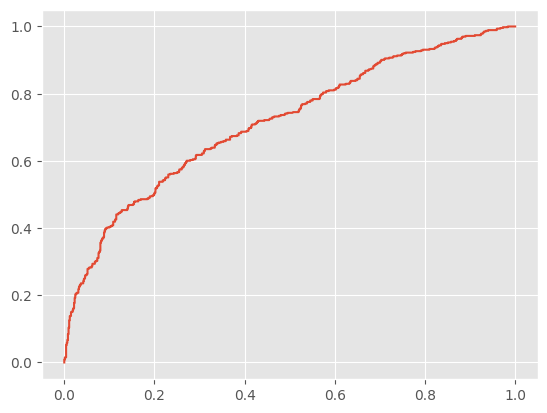

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,lr.predict_proba(x_test2)[:,1])
plt.plot(fpr,tpr)

In [ ]:
f1_score(y_test,y_pred)

0.5442875481386392

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       737
           1       0.67      0.46      0.54       463

    accuracy                           0.70      1200
   macro avg       0.69      0.66      0.66      1200
weighted avg       0.70      0.70      0.69      1200



In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy=accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred)
accuracy
# By removing CallStart,CallEnd,Marital and Education the accuracy has increased accuracy by 2.09%
# removed Balance_mid as balance_mid and balancd_high were having mutilicolinearity and removed age accuracy remains the same
# which means they weren't contributing anything
# as there was mulitilcolinearity in the labels which we have created.so removed the column balance and the accuracy increased by 1.41%

0.7041666666666667

In [ ]:
z=(0.7141666666666666-0.6841666666666667)*100
print(z)
data.columns.value_counts().count()
data.corr()

2.9999999999999916


,Age,HHInsurance,CarLoan,LastContactDay,PrevAttempts,CarInsurance,Job_blue-collar,Job_entrepreneur,Job_management,Job_services,...,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,NoOfContacts_2,NoOfContacts_3,NoOfContacts_4,NoOfContacts_5,NoOfContacts_6
Age,1.000000,-0.183861,-0.012383,0.013762,-0.002503,0.039158,-0.041406,0.014634,-0.028113,-0.078028,...,0.069861,-0.123739,0.044413,0.049980,0.000871,-0.006525,0.008601,0.023666,-0.012010,0.022572
HHInsurance,-0.183861,1.000000,0.088145,-0.024075,0.026900,-0.203419,0.211705,0.000794,-0.070785,0.017327,...,-0.068022,0.401428,0.014241,-0.080221,-0.075758,0.013908,0.008564,-0.010128,0.010539,-0.011662
CarLoan,-0.012383,0.088145,1.000000,0.011299,-0.020796,-0.092131,0.037652,0.021723,-0.039125,0.040956,...,-0.045012,0.007503,0.015299,-0.029126,-0.058345,-0.023687,0.011799,0.017085,0.010786,0.015498
LastContactDay,0.013762,-0.024075,0.011299,1.000000,-0.072977,-0.061271,-0.039161,-0.010123,-0.003592,0.051080,...,-0.042652,-0.009620,0.066605,0.046459,-0.068258,-0.004576,0.004501,0.000762,0.021765,0.119767
PrevAttempts,-0.002503,0.026900,-0.020796,-0.072977,1.000000,0.148763,-0.029935,-0.037146,0.028567,-0.012000,...,0.007190,-0.013580,0.026935,0.088389,0.107749,0.024217,0.006736,-0.009195,-0.016950,-0.049476
CarInsurance,0.039158,-0.203419,-0.092131,-0.061271,0.148763,1.000000,-0.111046,-0.032347,0.042905,-0.043080,...,0.118492,-0.152672,-0.012952,0.131689,0.138183,-0.024191,-0.002916,-0.030328,-0.037254,-0.087076
Job_blue-collar,-0.041406,0.211705,0.037652,-0.039161,-0.029935,-0.111046,1.000000,-0.127857,-0.262991,-0.297856,...,-0.059526,0.199966,-0.056275,-0.057994,-0.045374,0.007344,0.011582,0.002780,-0.017578,0.026162
Job_entrepreneur,0.014634,0.000794,0.021723,-0.010123,-0.037146,-0.032347,-0.127857,1.000000,-0.143582,-0.162618,...,-0.015676,-0.037851,0.037253,0.001798,-0.029618,-0.013197,0.022139,0.002297,0.005931,0.006454
Job_management,-0.028113,-0.070785,-0.039125,-0.003592,0.028567,0.042905,-0.262991,-0.143582,1.000000,-0.334490,...,0.025644,-0.104547,0.027276,-0.003184,0.064464,-0.001850,-0.002930,0.012529,0.006430,0.029134
Job_services,-0.078028,0.017327,0.040956,0.051080,-0.012000,-0.043080,-0.297856,-0.162618,-0.334490,1.000000,...,-0.002839,0.007369,-0.016591,-0.004702,-0.034805,0.018764,-0.002959,0.025819,0.001099,0.022071


<Axes: >

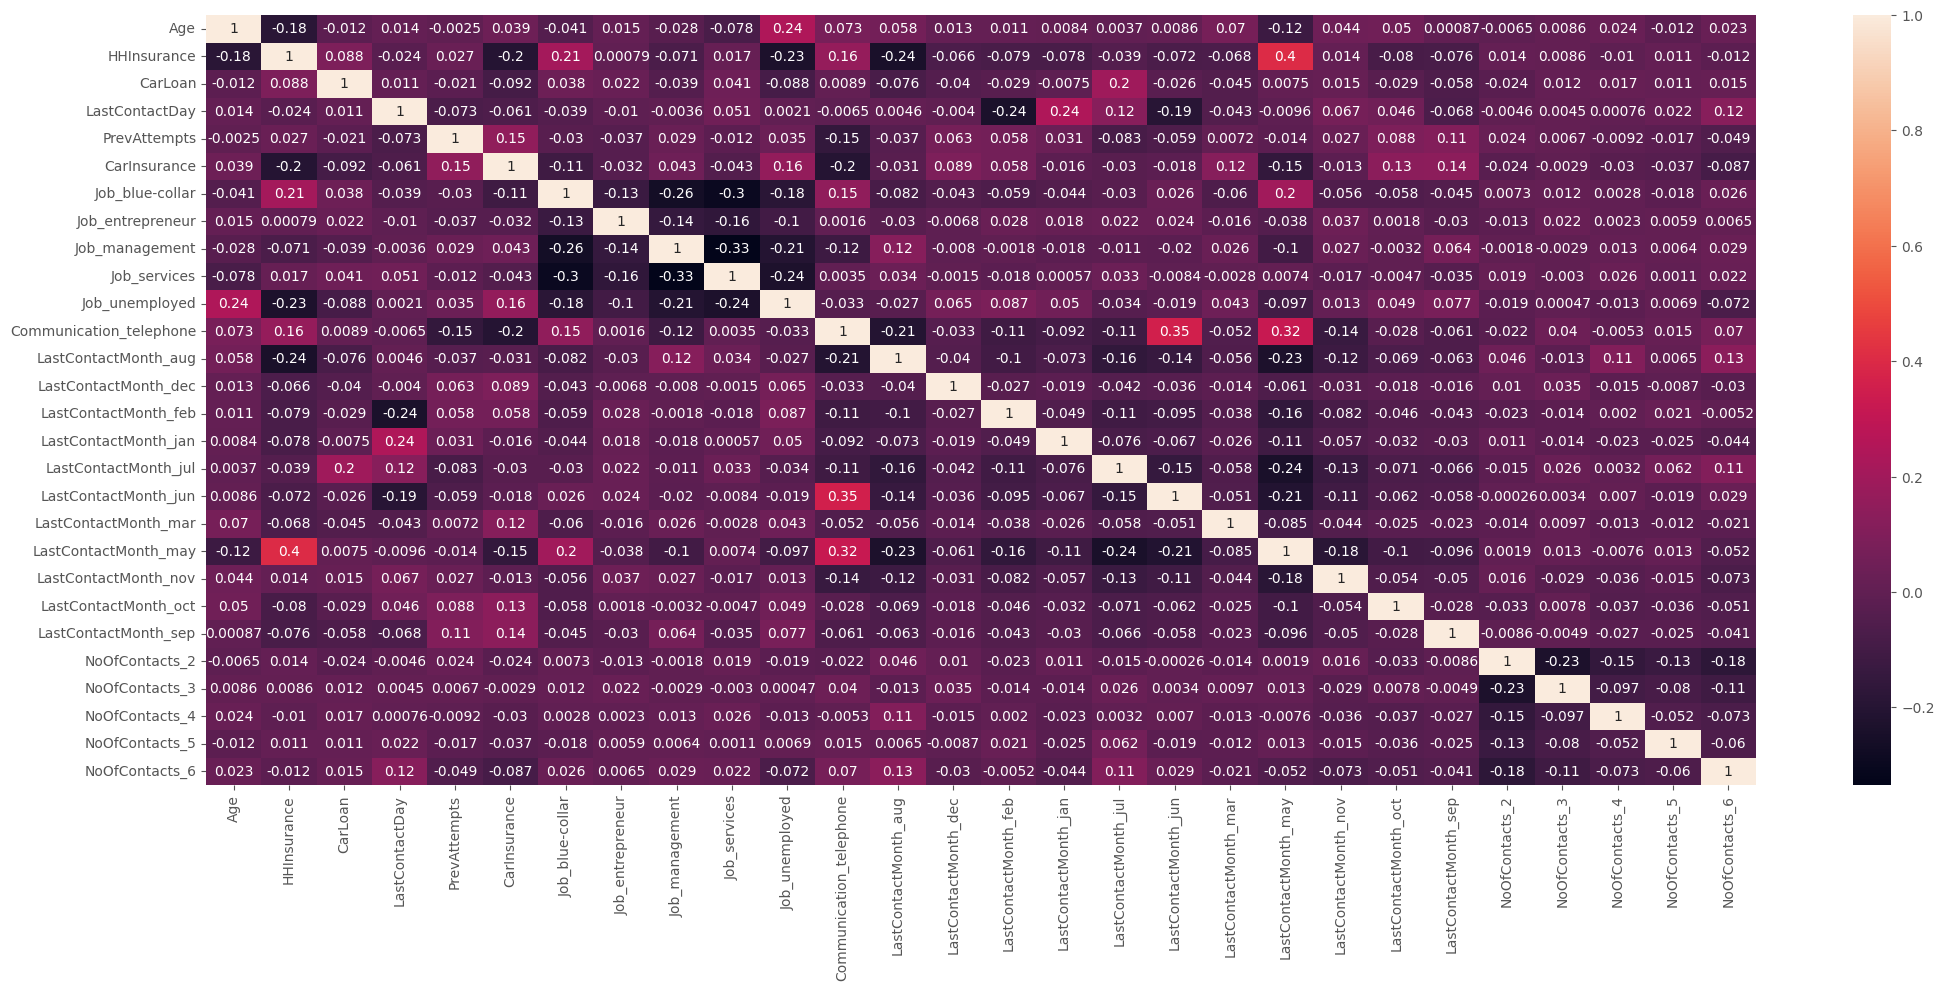

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data
vif_data['Feature']=data.columns
vif_data
vif_data['VIF']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif_data

,Feature,VIF
0,Age,10.977738
1,HHInsurance,2.494601
2,CarLoan,1.228239
3,LastContactDay,4.894070
4,PrevAttempts,1.211858
5,CarInsurance,1.886435
6,Job_blue-collar,2.425409
7,Job_entrepreneur,1.486401
8,Job_management,2.688579
9,Job_services,3.001237


In [ ]:
#data.drop('Balance_mid',axis=1,inplace=True)
data.drop('Age',axis=1,inplace=True)

<Axes: xlabel='CarInsurance', ylabel='count'>

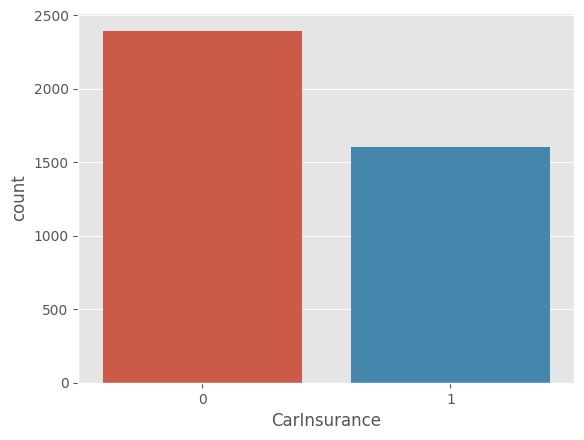

In [ ]:
sns.countplot(data=df,x='CarInsurance')

In [ ]:
data['CarInsurance'].unique()

array([0, 1])

In [ ]:
residual = pd.DataFrame(y_pred-y_test)
residual.sort_index(inplace=True)
residual

,CarInsurance
1,0
8,0
9,0
16,0
17,0
...,...
3982,0
3984,0
3985,0
3989,0


In [ ]:
data.corr()['CarInsurance']

HHInsurance               -0.203419
CarLoan                   -0.092131
LastContactDay            -0.061271
PrevAttempts               0.148763
CarInsurance               1.000000
Job_blue-collar           -0.111046
Job_entrepreneur          -0.032347
Job_management             0.042905
Job_services              -0.043080
Job_unemployed             0.156747
Communication_telephone   -0.199385
LastContactMonth_aug      -0.031350
LastContactMonth_dec       0.088926
LastContactMonth_feb       0.057602
LastContactMonth_jan      -0.016255
LastContactMonth_jul      -0.030247
LastContactMonth_jun      -0.017776
LastContactMonth_mar       0.118492
LastContactMonth_may      -0.152672
LastContactMonth_nov      -0.012952
LastContactMonth_oct       0.131689
LastContactMonth_sep       0.138183
NoOfContacts_2            -0.024191
NoOfContacts_3            -0.002916
NoOfContacts_4            -0.030328
NoOfContacts_5            -0.037254
NoOfContacts_6            -0.087076
Name: CarInsurance, dtype: f